In [1]:
import pandas as pd
df=pd.read_csv("bank.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.drop(columns=['customer_id','country','gender'],inplace=True)
churn=df['churn']
df.drop('churn',axis='columns',inplace=True)
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [3]:
df.isna().sum()

credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
dtype: int64

In [6]:
from scipy.stats import skew,kurtosis
features=df
skew=df.apply(skew)
kurtosis=df.apply(kurtosis)
distribution=pd.DataFrame({
    "mean":features.mean(),
    "Median":features.median(),
    "Mode":features.mode().iloc[0],
    "Variance":features.var(),
    "range":features.max()-features.min(),
    "InterQuartile":features.quantile(0.75)-features.quantile(0.25),
    "Skewness":skew,
    "Kurtosis":kurtosis
})
print(distribution)

                           mean      Median      Mode      Variance  \
credit_score         650.528800     652.000    850.00  9.341860e+03   
age                   38.921800      37.000     37.00  1.099941e+02   
tenure                 5.012800       5.000      2.00  8.364673e+00   
balance            76485.889288   97198.540      0.00  3.893436e+09   
products_number        1.530200       1.000      1.00  3.383218e-01   
credit_card            0.705500       1.000      1.00  2.077905e-01   
active_member          0.515100       1.000      1.00  2.497970e-01   
estimated_salary  100090.239881  100193.915  24924.92  3.307457e+09   

                      range  InterQuartile  Skewness  Kurtosis  
credit_score         500.00       134.0000 -0.071596 -0.426113  
age                   74.00        12.0000  1.011169  1.394050  
tenure                10.00         4.0000  0.010990 -1.165243  
balance           250898.09    127644.2400 -0.141088 -1.489267  
products_number        3.00        

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


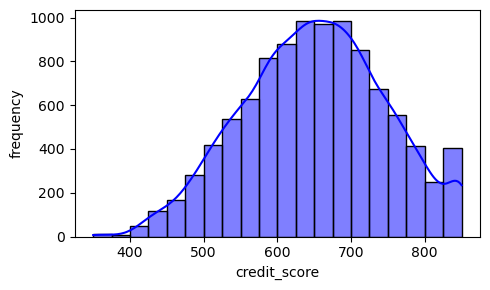

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


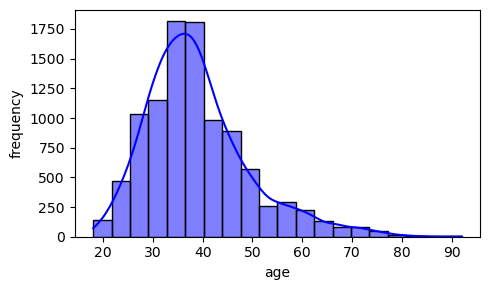

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


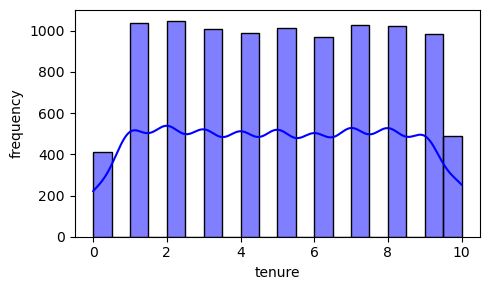

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


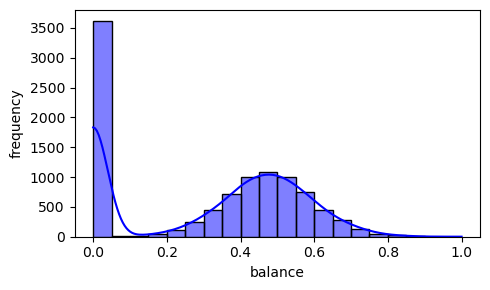

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


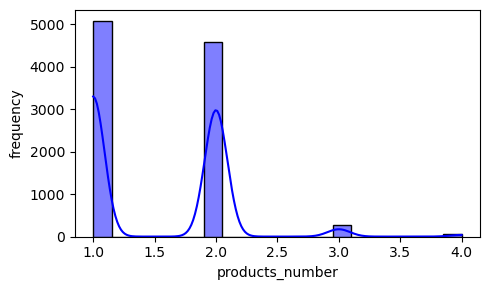

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


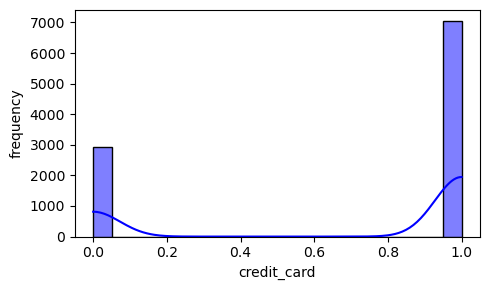

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


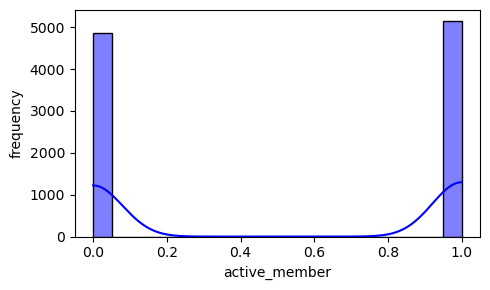

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


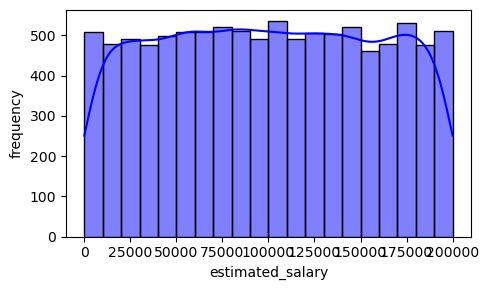

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
for columns in features:
    plt.figure(figsize=[5,3])
    sns.histplot(features[columns],kde=True,bins=20,color="Blue")
    plt.tight_layout()
    plt.xlabel(columns)
    plt.ylabel("frequency")
    plt.show()



In [14]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df['balance']=scaler.fit_transform(df['balance'].array.reshape(-1,1))

In [17]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,42,2,0.000000,1,1,1,101348.88
1,608,41,1,0.334031,1,0,1,112542.58
2,502,42,8,0.636357,3,1,0,113931.57
3,699,39,1,0.000000,2,0,0,93826.63
4,850,43,2,0.500246,1,1,1,79084.10


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['balance']=scaler.fit_transform(df['balance'].array.reshape(-1,1))

In [19]:
correlation=df.corr()

In [20]:
covariance=df.cov()

In [21]:
print(correlation)

                  credit_score       age    tenure   balance  products_number  \
credit_score          1.000000 -0.003965  0.000842  0.006268         0.012238   
age                  -0.003965  1.000000 -0.009997  0.028308        -0.030680   
tenure                0.000842 -0.009997  1.000000 -0.012254         0.013444   
balance               0.006268  0.028308 -0.012254  1.000000        -0.304180   
products_number       0.012238 -0.030680  0.013444 -0.304180         1.000000   
credit_card          -0.005458 -0.011721  0.022583 -0.014858         0.003183   
active_member         0.025651  0.085472 -0.028362 -0.010084         0.009612   
estimated_salary     -0.001384 -0.007201  0.007784  0.012797         0.014204   

                  credit_card  active_member  estimated_salary  
credit_score        -0.005458       0.025651         -0.001384  
age                 -0.011721       0.085472         -0.007201  
tenure               0.022583      -0.028362          0.007784  
balance   

In [22]:
print(covariance)

                  credit_score          age       tenure     balance  \
credit_score       9341.860157    -4.019150     0.235355    0.150675   
age                  -4.019150   109.994084    -0.303229    0.073836   
tenure                0.235355    -0.303229     8.364673   -0.008814   
balance               0.150675     0.073836    -0.008814    0.061850   
products_number       0.687999    -0.187157     0.022616   -0.044001   
credit_card          -0.240492    -0.056036     0.029773   -0.001684   
active_member         1.239139     0.448026    -0.040997   -0.001253   
estimated_salary  -7694.701048 -4343.372926  1294.686597  183.038007   

                  products_number  credit_card  active_member  \
credit_score             0.687999    -0.240492       1.239139   
age                     -0.187157    -0.056036       0.448026   
tenure                   0.022616     0.029773      -0.040997   
balance                 -0.044001    -0.001684      -0.001253   
products_number          0

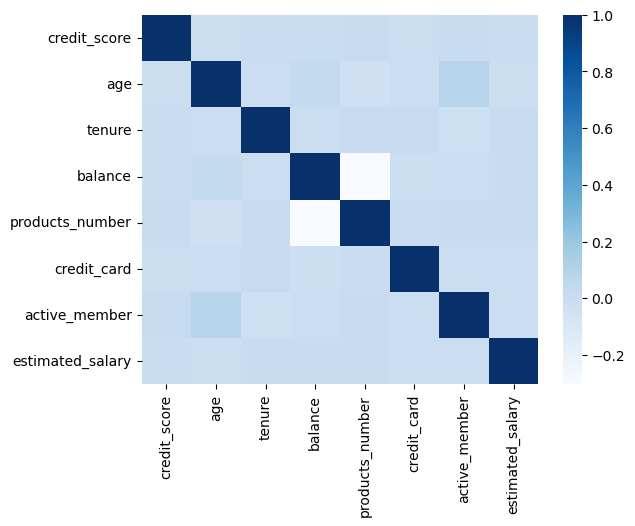

In [23]:
plt.figure()
sns.heatmap(correlation,cmap="Blues")
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [27]:
models={
    "logistic":LogisticRegression(),
    "randomForest":RandomForestClassifier(),
    "xgb":XGBClassifier(),
    "svm":SVC(),
    "knn":KNeighborsClassifier()
}

accuracy of logistic
0.7975
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.38      0.05      0.09       393

    accuracy                           0.80      2000
   macro avg       0.60      0.52      0.49      2000
weighted avg       0.73      0.80      0.73      2000



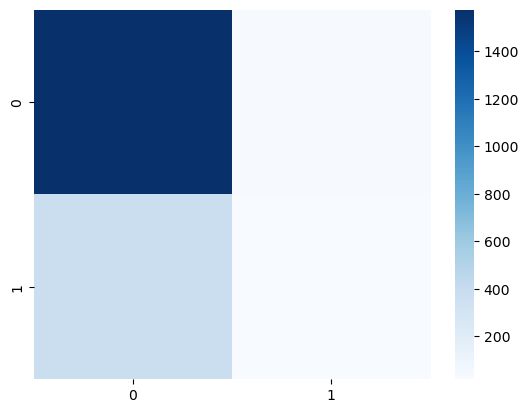

accuracy of randomForest
0.857
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.73      0.43      0.54       393

    accuracy                           0.86      2000
   macro avg       0.80      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



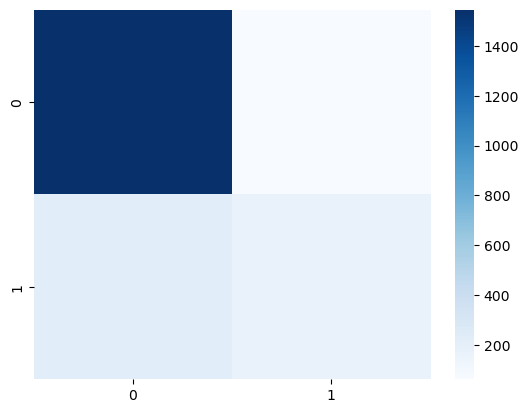

accuracy of xgb
0.843
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1607
           1       0.65      0.45      0.53       393

    accuracy                           0.84      2000
   macro avg       0.76      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



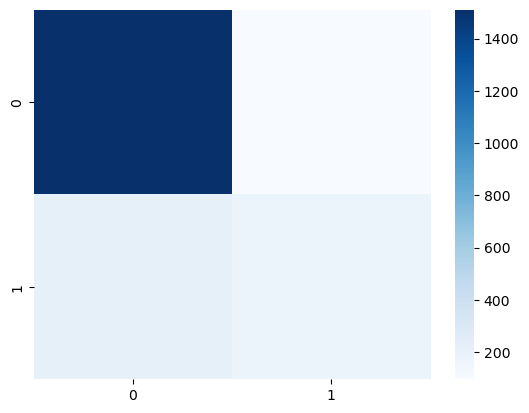

accuracy of svm
0.8035
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

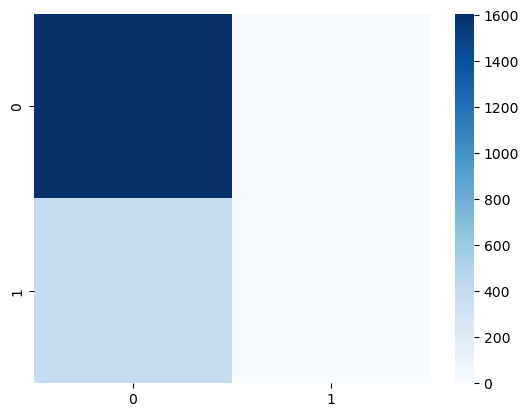

accuracy of knn
0.7685
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1607
           1       0.24      0.08      0.12       393

    accuracy                           0.77      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.77      0.72      2000



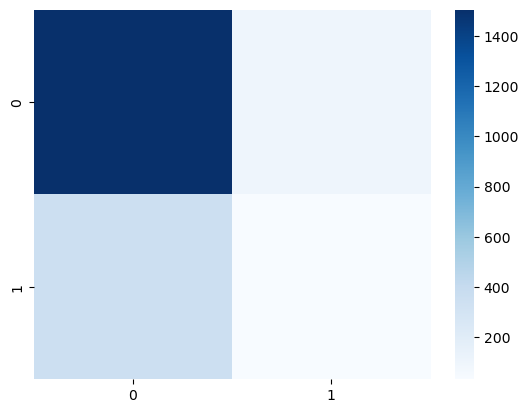

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
df['churn']=churn
x=df.iloc[:,:-1]
y=df['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print("accuracy of "+name)
    print(accuracy)
    print(classification_report(y_test,y_pred))
    plt.figure()
    sns.heatmap(confusion_matrix(y_test,y_pred),cmap="Blues")
    plt.show()